In [11]:
! pip install plotly
#! conda install -c plotly plotly-orca
#!pip install pandas

You should consider upgrading via the 'c:\users\siele\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go 
import plotly.express as px
from plotly.subplots import make_subplots

#pd.options.display. = '{:,.2f}'.format

py.init_notebook_mode(connected=True)

# Limpeza de Dados e Análise Exploratória do Perfil dos Investidores Individuais na B3

In [3]:
columns = ['classe_investidor', 'valor_vista', 'percent_vista', 'valor_termo', 'percent_termo', 'valor_opcoes', 'percent_opcoes', 'valor_exercicio_opcoes', 'percent_exercicio_opcoes', 'R$ Total geral', 'percent_total_geral']
participacao_investidores = pd.read_excel("participacao_investidoresB3-30-06-2020.xlsx", header=0)

In [4]:
participacao_investidores = participacao_investidores.iloc[5:,]
participacao_investidores.drop(participacao_investidores.columns[0], axis=1, inplace=True)
participacao_investidores = participacao_investidores.reset_index(drop=True)
participacao_investidores.columns = columns
participacao_investidores

,classe_investidor,valor_vista,percent_vista,valor_termo,percent_termo,valor_opcoes,percent_opcoes,valor_exercicio_opcoes,percent_exercicio_opcoes,R$ Total geral,percent_total_geral
0,Investidores Individuais,316223285206,0.2505,2120639349,0.226,6379160634,0.2046,2376880572,0.0389,327099965760,0.2398
1,Clubes de Investimento,2243986464,0.0018,107039040,0.0114,41430867,0.0013,26659252,0.0004,2419115623,0.0018
2,Institucionais,286065845577,0.2266,5131423241,0.5469,10004179084,0.3208,28417290354,0.4654,329618738256,0.2416
3,Investidores Estrangeiros,596375112280,0.4723,53228510,0.0057,13827905597,0.4435,26738174044,0.4379,636994420431,0.4669
4,Empresas Públicas e Privadas,9543689950,0.0076,165633629,0.0177,138748122,0.0044,87750392,0.0014,9935822093,0.0073
5,Instituições Financeiras,51925429203,0.0411,1804807985,0.1924,789506932,0.0253,3418823119,0.056,57938567239,0.0425
6,Outros,195090592,0.0002,0,0,0,0,0,0,195090592,0.0001


In [5]:
valores_investimentos = pd.DataFrame(columns=['tipo_investidor','tipo_operacao', 'valor','percent'])

j = 0
for investimento, idx in zip(participacao_investidores.values,range(participacao_investidores.shape[0])):
    for i, operacao in zip(range(0,len(investimento)-1,2),['vista','termo','opcoes','exercicio_opcoes','total']):
        pos = idx+j
        valores_investimentos.at[pos,'tipo_investidor'] = investimento[0]
        valores_investimentos.at[pos,'tipo_operacao'] = operacao
        valores_investimentos.at[pos,'valor'] = investimento[i+1]
        valores_investimentos.at[pos,'percent'] = investimento[i+2]
        j += 1

valores_investimentos.head(3)

,tipo_investidor,tipo_operacao,valor,percent
0,Investidores Individuais,vista,316223285206,0.2505
1,Investidores Individuais,termo,2120639349,0.226
2,Investidores Individuais,opcoes,6379160634,0.2046


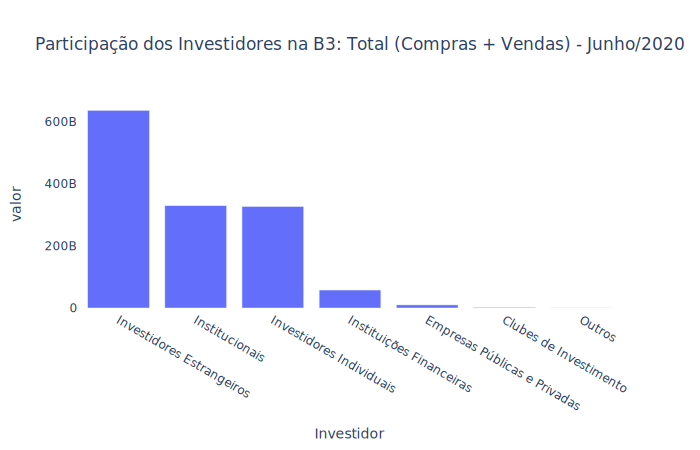

In [7]:
valores_investimentos = valores_investimentos.sort_values('valor', ascending=False)
valor_total = valores_investimentos[valores_investimentos.tipo_operacao == 'total']
fig = px.bar(valor_total, x='tipo_investidor', 
        y='valor', 
        hover_data=['percent', 'valor'],
        labels={'tipo_investidor':'Investidor'},
        title="Participação dos Investidores na B3: Total (Compras + Vendas) - Junho/2020")

fig.update_layout(plot_bgcolor='white')

#imagem estática para post no git
fig.show('svg')

#imagem dinâmica
#fig.show('svg')

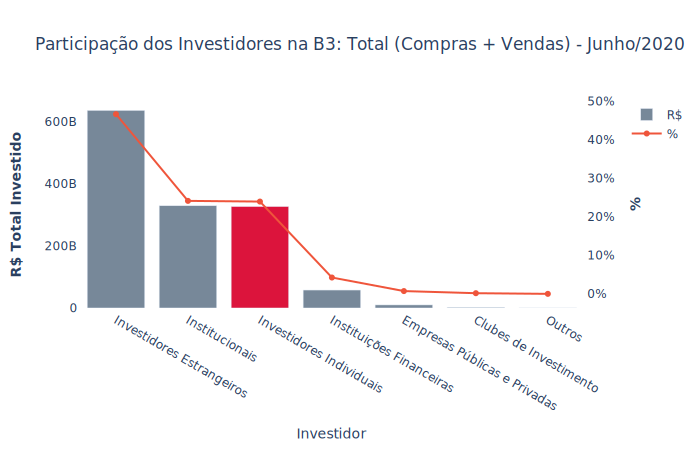

In [8]:
colors = ['lightslategray',] * 7
colors[2] = 'crimson'

# cria eixo secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=valor_total.tipo_investidor, y=valor_total.valor, name="R$",marker_color=colors),
                secondary_y=False)

fig.add_trace(go.Scatter(x=valor_total.tipo_investidor, y=valor_total.percent, name="%"),
                secondary_y=True)

fig.update_layout(title_text="Participação dos Investidores na B3: Total (Compras + Vendas) - Junho/2020",
                    xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='white')

fig.update_xaxes(title_text="Investidor")
fig.update_yaxes(title_text="<b>R$ Total Investido</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b>", secondary_y=True, tickformat = ".0%")

#imagem estática para post no git
fig.show('svg')

#imagem dinâmica
#fig.show('svg')

In [9]:
perfil_investidor_evolucao = pd.read_excel("perfil_investidores_jun2020.xlsx", 'Evolução Pessoa Física', skiprows=4)
perfil_investidor_evolucao = perfil_investidor_evolucao.iloc[:-8]
perfil_investidor_evolucao.drop(perfil_investidor_evolucao.columns[0], axis=1, inplace=True)
perfil_investidor_evolucao = perfil_investidor_evolucao.reset_index(drop=True)
perfil_investidor_evolucao.head(3)

,Unnamed: 1,Qtd,%,Qtd.1,%.1,Qtd.2
0,2002,70219.0,0.823693,15030.0,0.176307,85249.0
1,2003,69753.0,0.816035,15725.0,0.183965,85478.0
2,2004,94434.0,0.807722,22480.0,0.192278,116914.0


In [10]:
perfil_investidores = pd.DataFrame(columns=['ano','qtd','percent','genero'])

j = 0
for perfil, idx in zip(perfil_investidor_evolucao.values,range(perfil_investidor_evolucao.shape[0])):
    for i, genero in zip(range(0,len(perfil)-1,2),['homem','mulher']):
        pos = idx+j
        perfil_investidores.at[pos,'ano'] = perfil[0]
        perfil_investidores.at[pos,'qtd'] = perfil[i+1]
        perfil_investidores.at[pos,'percent'] = perfil[i+2]
        perfil_investidores.at[pos,'genero'] = genero
        j += 1

perfil_investidores.head(5)

,ano,qtd,percent,genero
0,2002,70219,0.823693,homem
1,2002,15030,0.176307,mulher
3,2003,69753,0.816035,homem
4,2003,15725,0.183965,mulher
6,2004,94434,0.807722,homem


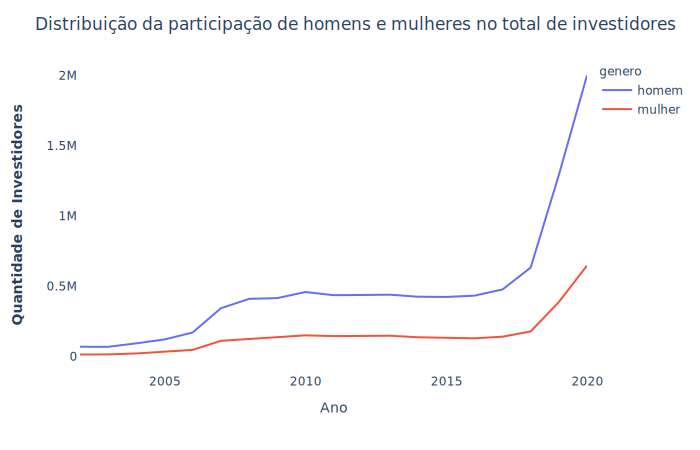

In [11]:
fig = px.line(perfil_investidores, x='ano', y='qtd',color='genero')
fig.update_layout(title_text="Distribuição da participação de homens e mulheres no total de investidores",
                    xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='white')
fig.update_xaxes(title_text="Ano")
fig.update_yaxes(title_text="<b>Quantidade de Investidores</b>")

#imagem estática para post no git
fig.show('svg')

#imagem dinâmica
#fig.show('svg')

In [12]:
perfil_investidor_raw = pd.read_excel("perfil_investidores_jun2020.xlsx", 'Detalhe Pessoa Física')

perfil_investidor_raw.head(8)

,VOP - DD/Investidores Central Depositária,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Perfil dos Investidores em,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-30,NaN,Critério1*,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,QUADRO DE INVESTIDORES PESSOA FÍSICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Quantidade de Investidores*,%,NaN,NaN,NaN,NaN,NaN,NaT,Estado,Contas,NaN,NaN,Valor (R$ bilhões),NaN,NaN,%,NaN
6,NaN,Pessoas Físicas,2648975,0.989031,NaN,NaN,NaN,NaN,NaN,NaT,NaN,HOMENS,MULHERES,TOTAL,HOMENS,MULHERES,TOTAL,NaN,NaN
7,A,Homens,2000810,0.74703,NaN,NaN,NaN,NaN,NaN,NaT,SP,767395,263644,1031039,131.852,38.6914,170.543,0.489116,NaN


In [13]:
perfil_investidor_region = perfil_investidor_raw.loc[7:,'Unnamed: 10':]
colunas_total_region = ['uf', 'qtd_contas', 'valor','percent']

perfil_investidor_region_total = pd.DataFrame(perfil_investidor_raw.loc[7:,'Unnamed: 10':],columns=['Unnamed: 10','Unnamed: 13','Unnamed: 16','Unnamed: 17'])
perfil_investidor_region_total.columns = colunas_total_region
perfil_investidor_region_total = perfil_investidor_region_total.iloc[:-1]
perfil_investidor_region_total.head(5)


,uf,qtd_contas,valor,percent
7,SP,1031039,170.543,0.489116
8,RJ,290798,53.5088,0.153463
9,MG,254918,35.2098,0.100982
10,RS,147362,18.6582,0.0535116
11,SC,124425,11.8988,0.0341258


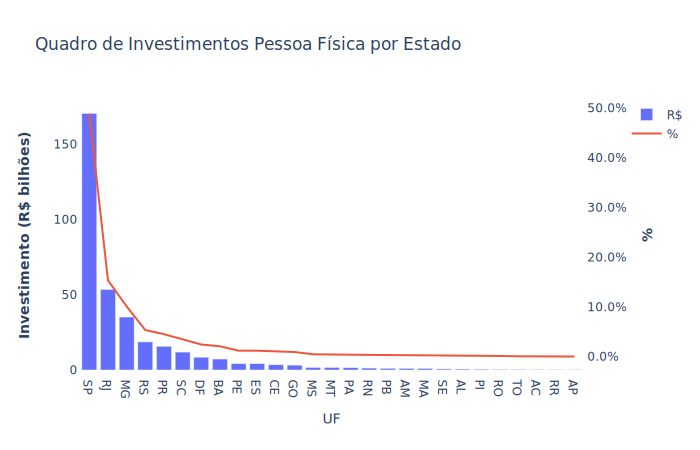

In [15]:
perfil_investidor_region_total = perfil_investidor_region_total.sort_values('valor', ascending=False)

# cria eixo secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=perfil_investidor_region_total.uf, y=perfil_investidor_region_total.valor, name="R$"),
                secondary_y=False)

fig.add_trace(go.Scatter(x=perfil_investidor_region_total.uf, y=perfil_investidor_region_total.percent, name="%"),
                secondary_y=True)

fig.update_layout(title_text="Quadro de Investimentos Pessoa Física por Estado",
                    xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='white')

fig.update_xaxes(title_text="UF")
fig.update_yaxes(title_text="<b>Investimento (R$ bilhões)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>%</b>", secondary_y=True, tickformat = ".1%")

#imagem estática para post no git
fig.show('svg')

#imagem dinâmica
#fig.show('svg')

In [16]:
perfil_investidor_region_genero = pd.DataFrame(perfil_investidor_raw.loc[7:,'Unnamed: 10':],columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 14','Unnamed: 15'])
perfil_genero = pd.DataFrame(columns=['uf','qtd_contas', 'valor', 'genero'])

j = 0
for perfil, idx in zip(perfil_investidor_region_genero.values,range(perfil_investidor_region_genero.shape[0])):
    for i, genero in zip(range(0,len(perfil)-1,2),['homem','mulher']):
        pos = idx+j
        perfil_genero.at[pos,'uf'] = perfil[0]
        perfil_genero.at[pos,'qtd_contas'] = perfil[i+1]
        perfil_genero.at[pos,'valor'] = perfil[i+2]
        perfil_genero.at[pos,'genero'] = genero
        j += 1

perfil_genero = perfil_genero.iloc[:-2]
perfil_genero.head(4)

,uf,qtd_contas,valor,genero
0,SP,767395,263644,homem
1,SP,131.852,38.6914,mulher
3,RJ,215356,75442,homem
4,RJ,39.9233,13.5855,mulher


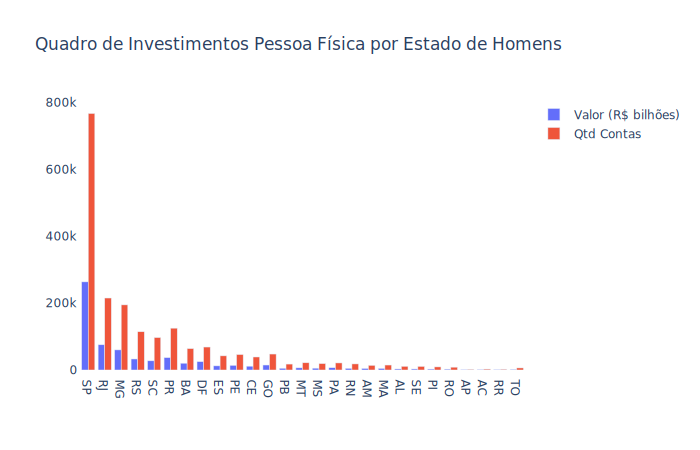

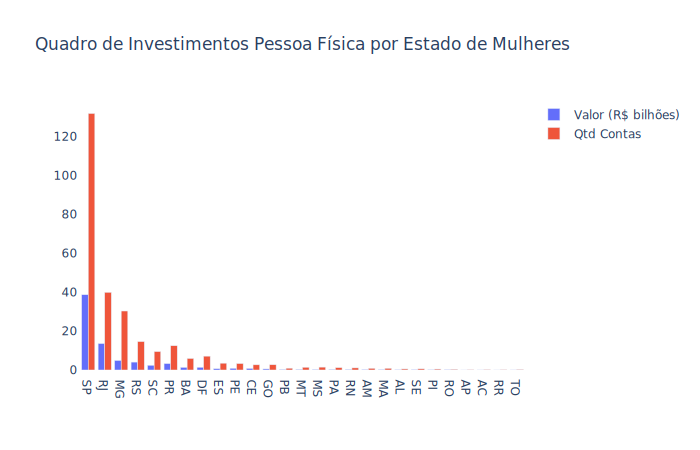

In [17]:
homem = perfil_genero.genero == 'homem'
mulher = perfil_genero.genero == 'mulher'

fig1 = go.Figure(data=[
    go.Bar(name='Valor (R$ bilhões)', x=perfil_genero[homem].uf, y=perfil_genero[homem].valor),
    go.Bar(name='Qtd Contas', x=perfil_genero[homem].uf, y=perfil_genero[homem].qtd_contas)
])

fig1.update_layout(barmode='group', xaxis_showgrid=False, yaxis_showgrid=False,
                    title = 'Quadro de Investimentos Pessoa Física por Estado de Homens',
                    plot_bgcolor='white')
#fig1.show()
#imagem estática para post no git
fig1.show('svg')

fig2 = go.Figure(data=[
    go.Bar(name='Valor (R$ bilhões)', x=perfil_genero[homem].uf, y=perfil_genero[mulher].valor),
    go.Bar(name='Qtd Contas', x=perfil_genero[homem].uf, y=perfil_genero[mulher].qtd_contas)
])

fig2.update_layout(barmode='group', xaxis_showgrid=False, yaxis_showgrid=False,
                    title = 'Quadro de Investimentos Pessoa Física por Estado de Mulheres',
                    plot_bgcolor='white')
#fig2.show()
#imagem estática para post no git
fig2.show('svg')

In [18]:
perfil_investidor_region = perfil_investidor_raw.loc[7:,'Unnamed: 10':]
colunas_total_region = ['uf', 'qtd_contas', 'valor','percent']

perfil_investidor_region_total = pd.DataFrame(perfil_investidor_raw.loc[7:,'Unnamed: 10':],columns=['Unnamed: 10','Unnamed: 13','Unnamed: 16','Unnamed: 17'])
perfil_investidor_region_total.columns = colunas_total_region
perfil_investidor_region_total = perfil_investidor_region_total.iloc[:-1]
perfil_investidor_region_total.head(5)

,uf,qtd_contas,valor,percent
7,SP,1031039,170.543,0.489116
8,RJ,290798,53.5088,0.153463
9,MG,254918,35.2098,0.100982
10,RS,147362,18.6582,0.0535116
11,SC,124425,11.8988,0.0341258


In [19]:
perfil_genero_total = perfil_investidor_raw.loc[7:8,'Unnamed: 1':'Unnamed: 3']
perfil_genero_total.columns = ['genero','qtd_contas','percent']
perfil_genero_total.at[7,'genero'] = 'homem'
perfil_genero_total.at[8,'genero'] ='mulher'
perfil_genero_total

,genero,qtd_contas,percent
7,homem,2000810,0.74703
8,mulher,648165,0.242001


perfil_faixa_etaria = perfil_investidor_raw.loc[19:25,'Unnamed: 1':'Unnamed: 8']
perfil_faixa_etaria.columns = ['faixa_etaria','genero','qtd_contas','percent']
#perfil_faixa_etaria.at[7,'genero'] = 'homem'
#perfil_faixa_etaria.at[8,'genero'] ='mulher'
perfil_faixa_etaria

#perfil_investidor_raw